In [32]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [2]:
df = pd.read_json('all.json')

In [3]:
df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,name,release_date,popularity,artist
0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,...,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,TiK ToK,2010-01-01,81,Kesha
1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,...,11EX5yhxr9Ihl3IN1asrfK,spotify:track:11EX5yhxr9Ihl3IN1asrfK,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,Need You Now,2010-01-01,71,Lady A
2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,...,4HlFJV71xXKIGcU3kRyttv,spotify:track:4HlFJV71xXKIGcU3kRyttv,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,"Hey, Soul Sister",2010-12-01,82,Train
3,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,...,6tS3XVuOyu10897O3ae7bi,spotify:track:6tS3XVuOyu10897O3ae7bi,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,https://api.spotify.com/v1/audio-analysis/6tS3...,234653,4,California Gurls,2012-03-12,76,Katy Perry
4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,...,1bM50INir8voAkVoKuvEUI,spotify:track:1bM50INir8voAkVoKuvEUI,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,OMG (feat. will.i.am),2010-03-30,73,Usher
5,0.660,0.867,6,-4.285,0,0.1160,0.11000,0.000000,0.0368,0.377,...,6lV2MSQmRIkycDScNtrBXO,spotify:track:6lV2MSQmRIkycDScNtrBXO,https://api.spotify.com/v1/tracks/6lV2MSQmRIky...,https://api.spotify.com/v1/audio-analysis/6lV2...,180480,4,Airplanes (feat. Hayley Williams of Paramore),2010-04-27,75,B.o.B
6,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.641,...,15JINEqzVMv3SvJTAXAKED,spotify:track:15JINEqzVMv3SvJTAXAKED,https://api.spotify.com/v1/tracks/15JINEqzVMv3...,https://api.spotify.com/v1/audio-analysis/15JI...,263373,4,Love The Way You Lie,2010-06-18,82,Eminem
7,0.696,0.921,0,-3.755,1,0.0363,0.00314,0.000052,0.0842,0.714,...,0SiywuOBRcynK0uKGWdCnn,spotify:track:0SiywuOBRcynK0uKGWdCnn,https://api.spotify.com/v1/tracks/0SiywuOBRcyn...,https://api.spotify.com/v1/audio-analysis/0Siy...,294573,4,Bad Romance,2009-11-05,82,Lady Gaga
8,0.754,0.804,4,-3.177,1,0.0853,0.00332,0.000000,0.0329,0.818,...,1DqdF42leyFIzqNDv9CjId,spotify:track:1DqdF42leyFIzqNDv9CjId,https://api.spotify.com/v1/tracks/1DqdF42leyFI...,https://api.spotify.com/v1/audio-analysis/1Dqd...,203867,4,Dynamite,2010-01-01,65,Taio Cruz
9,0.666,0.899,8,-4.676,1,0.0280,0.00155,0.000000,0.0677,0.629,...,1CdqVF1ywD0ZO1zXtB9yWa,spotify:track:1CdqVF1ywD0ZO1zXtB9yWa,https://api.spotify.com/v1/tracks/1CdqVF1ywD0Z...,https://api.spotify.com/v1/audio-analysis/1Cdq...,186267,4,Break Your Heart,2010-01-01,61,Taio Cruz


In [4]:
#changing release_date to just year only
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [5]:
#move songname, popularity and release year ahead in the df
df.insert(0, 'name', df.pop('name'))
df.insert(1, 'artist', df.pop('artist'))
df.insert(2, 'year', df.pop('year'))
df.insert(3, 'popularity', df.pop('popularity'))

In [6]:
drop_columns = ['type', 'id', 'uri', 'track_href', 'analysis_url','release_date']
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,name,artist,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,TiK ToK,Kesha,2010,81,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,199693,4
1,Need You Now,Lady A,2010,71,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,277573,4
2,"Hey, Soul Sister",Train,2010,82,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,216773,4
3,California Gurls,Katy Perry,2012,76,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,234653,4
4,OMG (feat. will.i.am),Usher,2010,73,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,269493,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1000 non-null   object 
 1   artist            1000 non-null   object 
 2   year              1000 non-null   int64  
 3   popularity        1000 non-null   int64  
 4   danceability      1000 non-null   float64
 5   energy            1000 non-null   float64
 6   key               1000 non-null   int64  
 7   loudness          1000 non-null   float64
 8   mode              1000 non-null   int64  
 9   speechiness       1000 non-null   float64
 10  acousticness      1000 non-null   float64
 11  instrumentalness  1000 non-null   float64
 12  liveness          1000 non-null   float64
 13  valence           1000 non-null   float64
 14  tempo             1000 non-null   float64
 15  duration_ms       1000 non-null   int64  
 16  time_signature    1000 non-null   int64  
d

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2014.107000,2.954027,2008.0,2012.000000,2014.0000,2017.000000,2021.000
popularity,1000.0,53.717000,29.655663,0.0,43.750000,66.0000,74.000000,92.000
danceability,1000.0,0.664602,0.135949,0.0,0.581000,0.6725,0.754000,0.970
energy,1000.0,0.679843,0.158631,0.0,0.581000,0.7020,0.802000,0.972
key,1000.0,5.388000,3.677633,0.0,2.000000,6.0000,9.000000,11.000
loudness,1000.0,-5.751874,3.105892,-60.0,-6.658750,-5.4035,-4.308250,-1.190
mode,1000.0,0.631000,0.482775,0.0,0.000000,1.0000,1.000000,1.000
speechiness,1000.0,0.101814,0.097905,0.0,0.040675,0.0588,0.119250,0.592
acousticness,1000.0,0.146832,0.190568,0.0,0.019700,0.0665,0.194750,0.978
instrumentalness,1000.0,0.003997,0.035880,0.0,0.000000,0.0000,0.000008,0.680


In [9]:
df['popularity'].value_counts().head()

0     162
74     36
72     36
71     35
77     33
Name: popularity, dtype: int64

In [10]:
#replacing 0 values with mean value
df['popularity'] = df['popularity'].replace(0,df['popularity'].mean())
df['popularity'].value_counts().head()

53.717    162
74.000     36
72.000     36
71.000     35
77.000     33
Name: popularity, dtype: int64

In [11]:
dup = df[df.duplicated(['name','artist'])]
alldup = df[df.duplicated(['name','artist'], keep = False)]
print(len(dup),len(alldup),"ratio",len(alldup)/len(dup))
dup.head(5)

93 186 ratio 2.0


,name,artist,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
114,Just the Way You Are,Bruno Mars,2010,82.0,0.635,0.841,5,-5.379,1,0.0422,0.01340,0.000000,0.0622,0.424,109.021,220734,4
134,If I Die Young,The Band Perry,2010,68.0,0.606,0.497,4,-6.611,1,0.0277,0.34800,0.000000,0.2750,0.362,130.739,222773,4
139,Only Girl (In The World),Rihanna,2010,55.0,0.786,0.716,11,-4.253,0,0.0409,0.10200,0.000017,0.0557,0.595,125.921,235520,4
143,Dynamite,Taio Cruz,2010,65.0,0.754,0.804,4,-3.177,1,0.0853,0.00332,0.000000,0.0329,0.818,119.968,203867,4
151,Just A Dream,Nelly,2010,74.0,0.531,0.752,1,-6.161,1,0.0305,0.04210,0.000000,0.1200,0.103,89.917,237800,4


In [12]:
#we can conclude that there are 93 songs that appear in two charts. since the ratio is 2, there is no song that appear in three charts. 

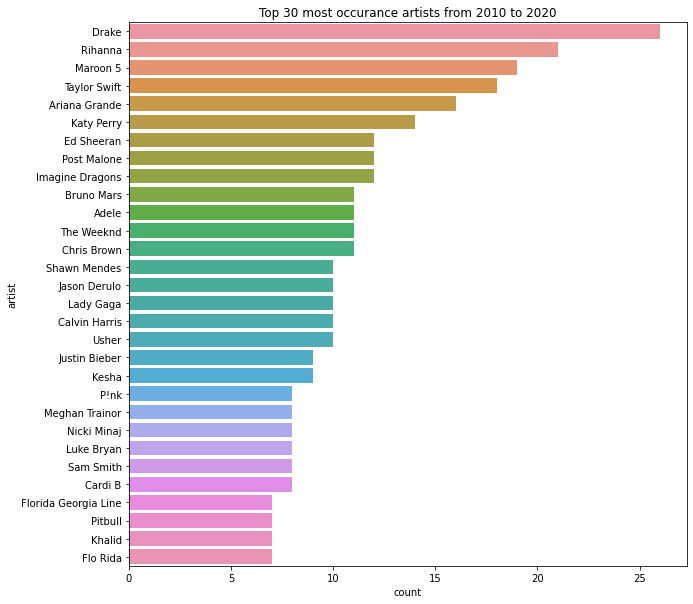

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=df, order=df['artist'].value_counts().head(30).index).set_title('Top 30 most occurance artists from 2010 to 2020')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of track data')

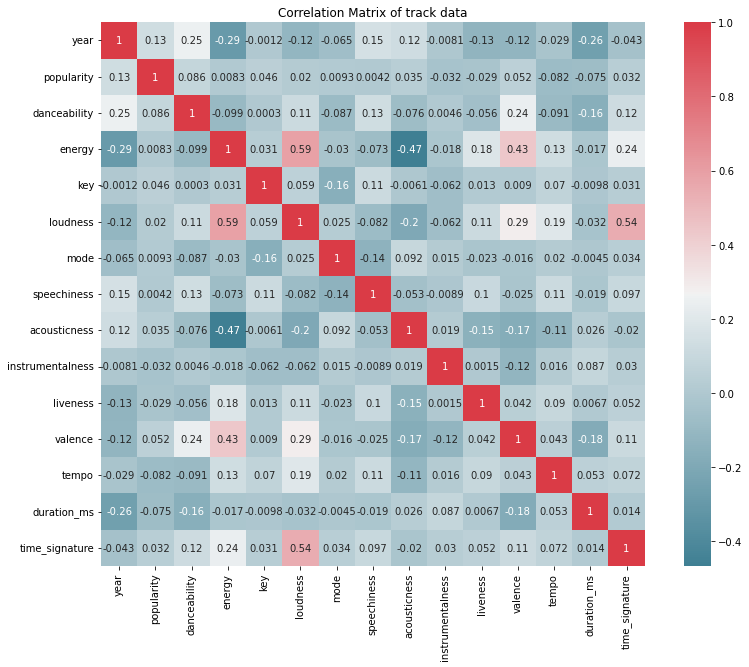

In [14]:
#getting correlation matrix
f, ax = plt.subplots(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of track data')

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

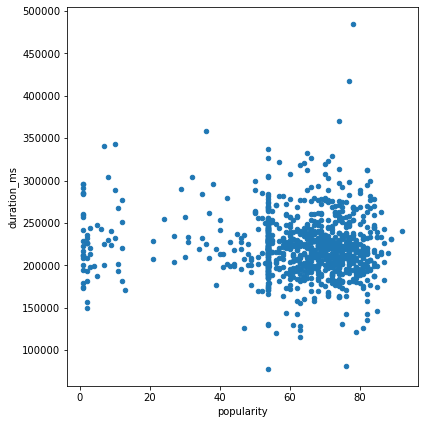

In [39]:
#scatterplot for duration and popularity
df.plot.scatter(x = 'popularity', y = 'duration_ms', figsize = (6,6))

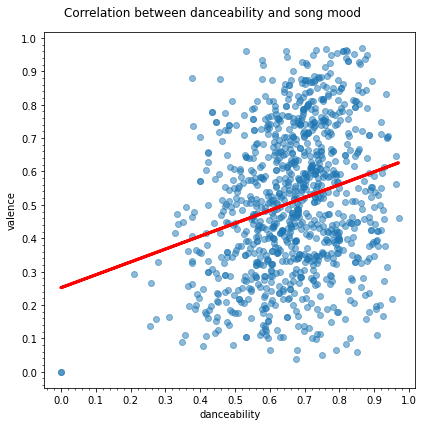

In [38]:
x = df["danceability"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

C:\Users\PS42\AppData\Local\Temp\ipykernel_8636\1217157635.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


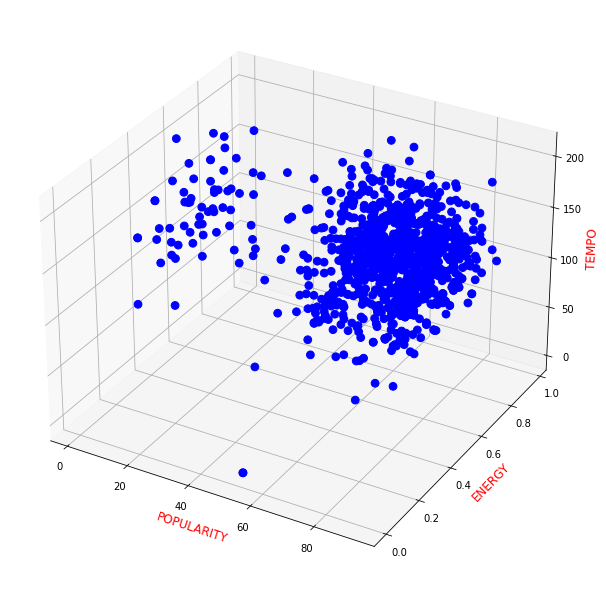

In [78]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("POPULARITY", fontsize = 12, color = "r")
ax.set_ylabel("ENERGY", fontsize = 12, color = "r")
ax.set_zlabel("TEMPO", fontsize = 12, color = "r")
ax.scatter3D(df['popularity'], df['energy'], df['tempo'], alpha=1, s=60, color = "b")
plt.show()

In [45]:
dfx = sqldf('SELECT year, AVG(popularity), AVG(danceability), AVG(energy), AVG(speechiness), AVG(acousticness), AVG(instrumentalness), AVG(liveness), AVG(valence), AVG(tempo) FROM df GROUP BY year')
dfx = dfx.drop(12)
dfx

,year,AVG(popularity),AVG(danceability),AVG(energy),AVG(speechiness),AVG(acousticness),AVG(instrumentalness),AVG(liveness),AVG(valence),AVG(tempo)
0,2008,58.333333,0.669333,0.769000,0.058000,0.141833,0.000011,0.084900,0.588667,115.305333
1,2009,52.925429,0.584452,0.751738,0.089981,0.113489,0.006970,0.224819,0.524000,119.538095
2,2010,63.033723,0.650457,0.751553,0.101055,0.110281,0.001348,0.199374,0.550277,117.028553
3,2011,55.152743,0.628457,0.719867,0.095656,0.137101,0.009131,0.174927,0.530653,129.209133
4,2012,64.318781,0.637286,0.741781,0.079723,0.107860,0.000416,0.198694,0.555410,121.124590
5,2013,63.514644,0.635425,0.717517,0.081467,0.119280,0.009594,0.162539,0.522379,125.943069
6,2014,59.991562,0.644943,0.647451,0.077082,0.162115,0.000990,0.162885,0.499510,119.321400
7,2015,60.847255,0.661191,0.645484,0.097851,0.168591,0.000828,0.183174,0.496096,124.776011
8,2016,65.857299,0.683793,0.637793,0.114977,0.153656,0.004990,0.154955,0.466730,122.461862
9,2017,65.776593,0.716965,0.635469,0.116363,0.166147,0.003568,0.147670,0.503453,118.142850


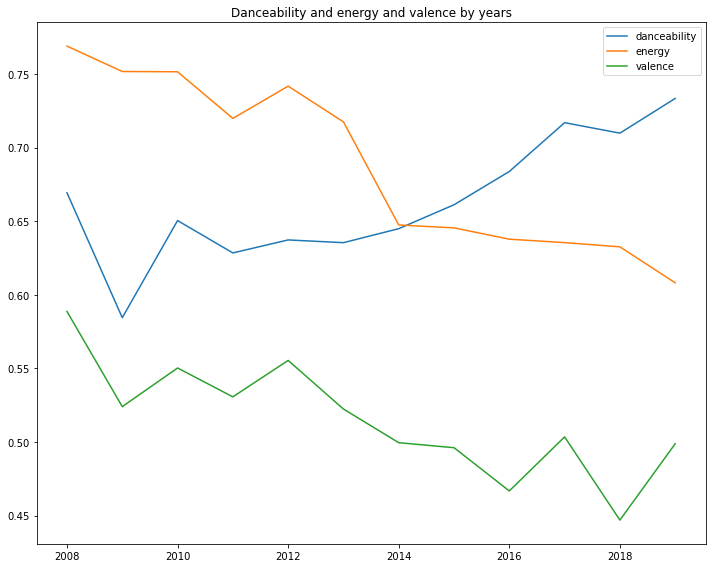

In [46]:
plt.figure(figsize=(10,8))
plt.title("Danceability and energy and valence by years")
plt.plot(dfx['year'], dfx['AVG(danceability)'], label = 'danceability')
plt.plot(dfx['year'], dfx['AVG(energy)'], label = 'energy')
plt.plot(dfx['year'], dfx['AVG(valence)'], label = 'valence')
plt.legend()
plt.show()

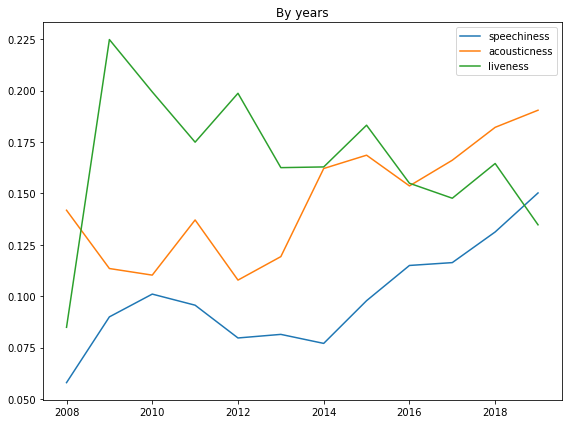

In [ ]:
plt.figure(figsize=(8,6))
plt.title("By years")
plt.plot(dfx['year'], dfx['AVG(speechiness)'], label = 'speechiness')
plt.plot(dfx['year'], dfx['AVG(acousticness)'], label = 'acousticness')
plt.plot(dfx['year'], dfx['AVG(liveness)'], label = 'liveness')
plt.legend()
plt.show()

C:\Users\PS42\AppData\Local\Temp\ipykernel_8636\1217157635.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


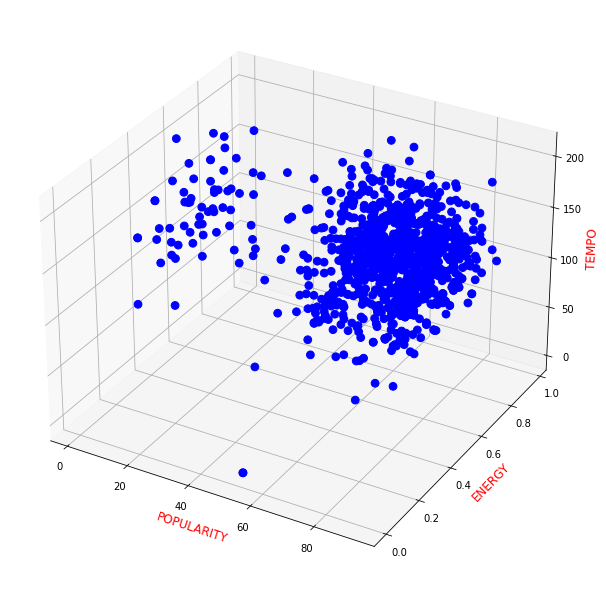